In [ ]:
# Rifat Saeed
# Molecules’ Solubility using GraphCon Model

In [ ]:
!pip install DeepChem

     |████████████████████████████████| 552 kB 4.5 MB/s 


In [ ]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
import deepchem as dc

In [ ]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
train_dataset, valid_dataset, test_dataset = datasets

In [ ]:
train_dataset

<DiskDataset X.shape: (902,), y.shape: (902, 1), w.shape: (902, 1), ids: ['CC(C)=CCCC(C)=CC(=O)' 'CCCC=C' 'CCCCCCCCCCCCCC' ...
 'Nc2cccc3nc1ccccc1cc23 ' 'C1CCCCCC1' 'OC1CCCCCC1'], task_names: ['measured log solubility in mols per litre']>

In [ ]:
from deepchem.models.graph_models import GraphConvModel

In [ ]:
for d in [0.18,0.20,0.25]:
    model = GraphConvModel(n_tasks=1, mode='regression', dropout=d)
    model.fit(train_dataset, nb_epoch=100)
    metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
    print(model.evaluate(train_dataset, [metric], transformers))
    print(model.evaluate(test_dataset, [metric], transformers))    

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_14:0", shape=(359,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_13:0", shape=(359, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_17:0", shape=(1068,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model/graph_pool_1/Reshape_16

{'pearson_r2_score': 0.9127253907569425}
{'pearson_r2_score': 0.6151622941911887}


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_14:0", shape=(377,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_13:0", shape=(377, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/Reshape_17:0", shape=(1068,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_1/graph_pool_3/

KeyboardInterrupt: ignored

In [ ]:
for e in [500,700,900]:
    model = GraphConvModel(n_tasks=1, mode='regression', dropout=0.20)
    model.fit(train_dataset, nb_epoch=e)
    metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
    print(model.evaluate(train_dataset, [metric], transformers))
    print(model.evaluate(test_dataset, [metric], transformers))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_2/graph_pool_5/Reshape_14:0", shape=(359,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_2/graph_pool_5/Reshape_13:0", shape=(359, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_2/graph_pool_5/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_2/graph_pool_5/Reshape_17:0", shape=(988,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_2/graph_pool_5/R

KeyboardInterrupt: ignored

In [ ]:
# optimized values of dropout and epoch
model = GraphConvModel(n_tasks=1, mode='regression', dropout=0.20)
model.fit(train_dataset, nb_epoch=1000)
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
print(model.evaluate(train_dataset, [metric], transformers))
print(model.evaluate(test_dataset, [metric], transformers))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Reshape_14:0", shape=(334,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Reshape_13:0", shape=(334, 64), dtype=float32), dense_shape=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Cast_4:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/Reshape_17:0", shape=(992,), dtype=int32), values=Tensor("gradient_tape/private__graph_conv_keras_model_3/graph_pool_7/R

{'pearson_r2_score': 0.9794254052845106}
{'pearson_r2_score': 0.7356312477187865}


In [ ]:
#Now that we have the model, we can use it to predict the solubilities of new 
# molecules


In [ ]:
# five molecules
smiles = ['CN1CCC[C@H]1c2cccnc2','CCOC(=O)CC','CSc1nc(NC(C)C)nc(NC(C)C)n1',
 'CC(C#C)N(C)C(=O)Nc1ccc(Cl)cc1','Cc1cc2ccccc2cc1C']

In [ ]:
from rdkit import Chem
mols=[Chem.MolFromSmiles(s) for s in smiles] 

In [ ]:
from rdkit.Chem import Draw
from rdkit import Chem
img=Draw.MolsToGridImage(mols)

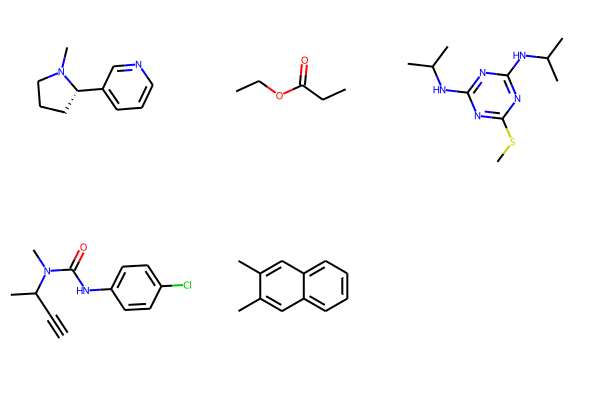

In [ ]:
img

In [ ]:
featurizer = dc.feat.ConvMolFeaturizer()
x = featurizer.featurize(mols)

In [ ]:
for i in range(5):
  print(x[i].get_num_atoms())

12
7
16
16
12


In [ ]:
len(x) # contains 5 lists with  featurized fragments from 5 mols

5

In [ ]:
predicted_solubility = model.predict_on_batch(x)

In [ ]:
predicted_solubility 

array([[ 0.58146036],
       [ 1.318019  ],
       [-0.04419285],
       [-0.48601666],
       [-0.38898626]], dtype=float32)

In [ ]:
# Golucose Solubility Prediction
s1=['OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@H](O)1']
mols2 = [Chem.MolFromSmiles(s2) for s2 in s1]
x2 = featurizer.featurize(mols2)
predicted_solubility2 = model.predict_on_batch(x2)

In [ ]:
predicted_solubility2 

array([[2.0828946]], dtype=float32)